In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("fashionnova_reviews.csv")

In [4]:
df.head()

,Reviewer Name,Profile Link,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience
0,Champagne,/users/66c78240087b6269ffbcb5fb,US,1 review,2024-08-22T20:24:02.000Z,Rated 5 out of 5 stars,I love ordering from fashion nova,I love ordering from fashion nova. The clothes...,"August 22, 2024"
1,Vg customer,/users/6618fdb53d4198001210cbe7,VG,3 reviews,2024-08-21T05:43:11.000Z,Rated 5 out of 5 stars,Top tier content for fashion nova,Always amazing clothes and the fast shipping i...,"August 18, 2024"
2,Colleen Burgher,/users/64e9595206be1a001244ff73,US,3 reviews,2024-08-21T17:09:14.000Z,Rated 5 out of 5 stars,Prices and quality of products are…,Prices and quality of products are GREAT Would...,"August 21, 2024"
3,R.G.M,/users/66c58ad1c6ab36352a08f57a,US,1 review,2024-08-21T08:36:03.000Z,Rated 5 out of 5 stars,Great customer service,Great customer service. I was helped until the...,"August 20, 2024"
4,Rosalyn Cousar,/users/60ad4b6ef3788e001adbb8e3,US,5 reviews,2024-08-22T00:46:16.000Z,Rated 3 out of 5 stars,False advertising,Disappointing experience. You don’t live up to...,"August 21, 2024"


In [30]:
# 1. Handling missing values: Dropping rows where 'Reviewer Name' or 'Country' is missing
df_cleaned = df.dropna(subset=['Reviewer Name', 'Country'])

# 2. Converting 'Review Date' and 'Date of Experience' to datetime format
df_cleaned['Review Date'] = pd.to_datetime(df_cleaned['Review Date'])
df_cleaned['Date of Experience'] = pd.to_datetime(df_cleaned['Date of Experience'], format='%B %d, %Y')

# 3. Extracting numerical rating from the 'Rating' column
df_cleaned['Rating'] = df_cleaned['Rating'].str.extract('(\d)').astype(int)

# 4. Cleaning the 'Review Count' column to extract the numerical part
df_cleaned['Review Count'] = df_cleaned['Review Count'].str.extract('(\d+)').astype(int)

# Display the cleaned data
df_cleaned.head()
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 131868 entries, 0 to 131979
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   Reviewer Name       131868 non-null  object             
 1   Profile Link        131868 non-null  object             
 2   Country             131868 non-null  object             
 3   Review Count        131868 non-null  int32              
 4   Review Date         131868 non-null  datetime64[ns, UTC]
 5   Rating              131868 non-null  int32              
 6   Review Title        131868 non-null  object             
 7   Review Text         131868 non-null  object             
 8   Date of Experience  131868 non-null  datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), int32(2), object(5)
memory usage: 9.1+ MB


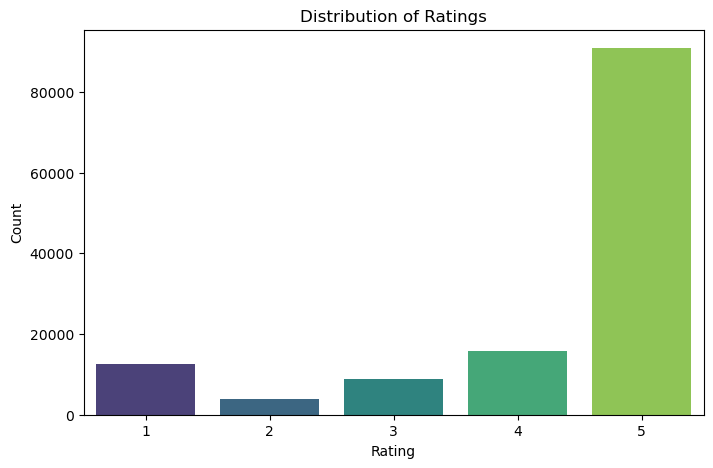

In [14]:
# Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=df_cleaned, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


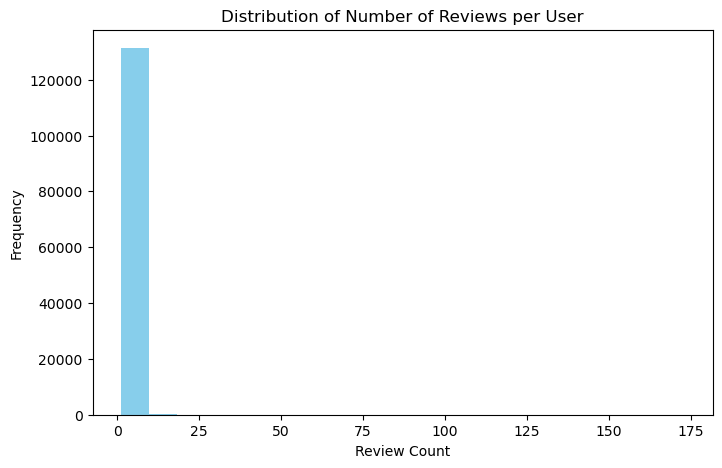

count    131868.000000
mean          1.581339
std           1.719707
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         173.000000
Name: Review Count, dtype: float64

In [21]:
# Using Matplotlib directly to plot the histogram
plt.figure(figsize=(8, 5))
plt.hist(df_cleaned['Review Count'].dropna(), bins=20, color='skyblue')
plt.title('Distribution of Number of Reviews per User')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.show()

# Summary statistics of the Review Count
df_cleaned['Review Count'].describe()


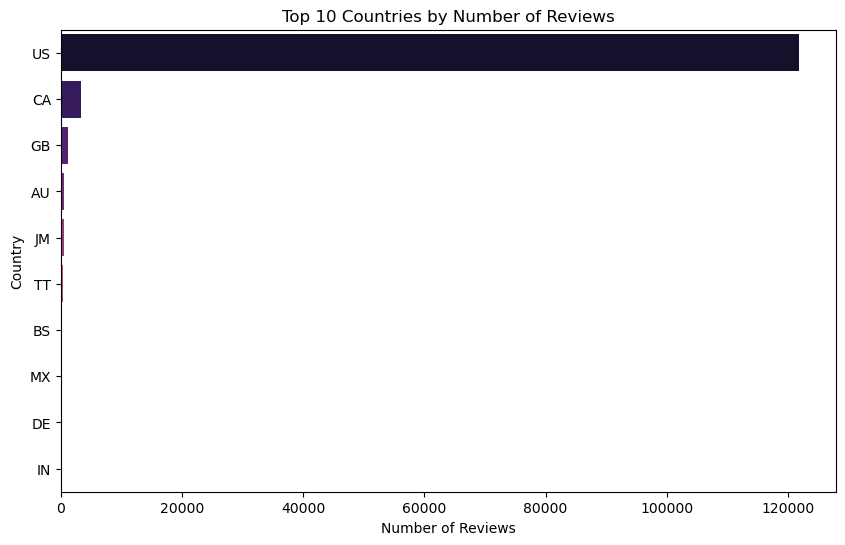

In [22]:
# Top 10 countries with the most reviews
top_countries = df_cleaned['Country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title('Top 10 Countries by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Country')
plt.show()


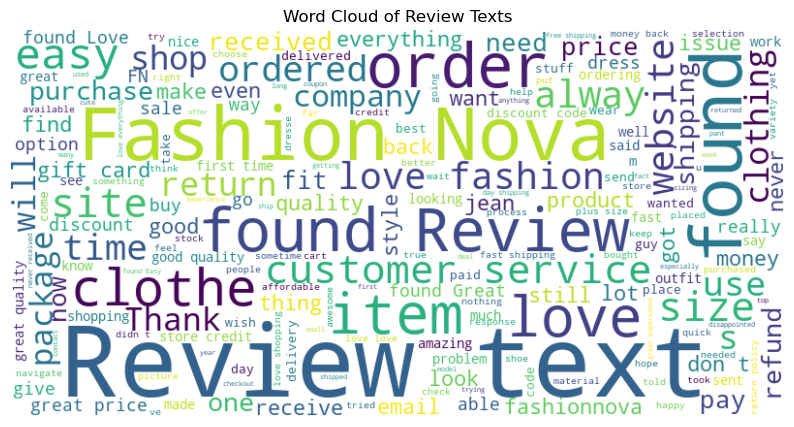

In [23]:
# Combine all reviews into one string
text = ' '.join(review for review in df_cleaned['Review Text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Texts')
plt.show()


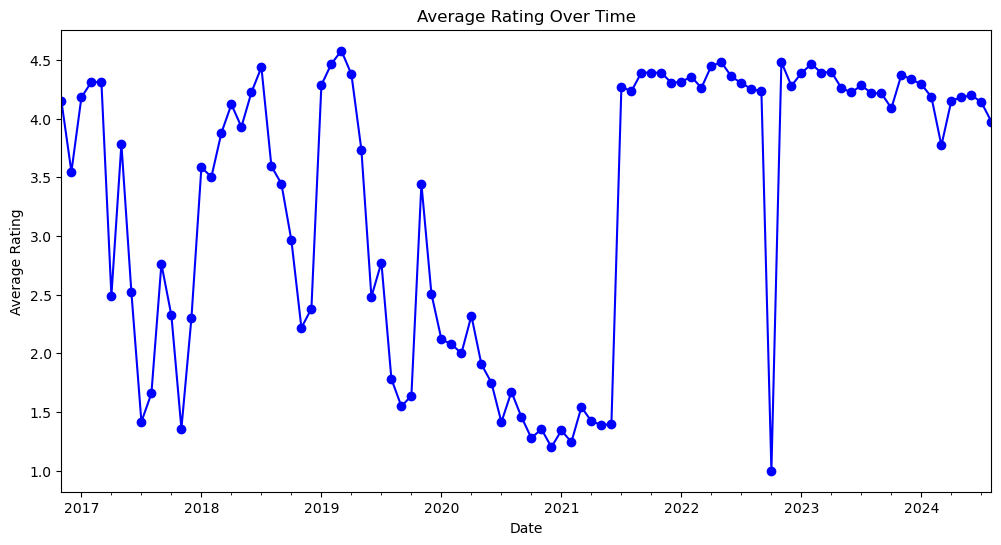

In [31]:
# Reviews Over Time
df_cleaned.set_index('Review Date', inplace=True)

plt.figure(figsize=(12, 6))
df_cleaned['Rating'].resample('M').mean().plot(color='blue', marker='o')
plt.title('Average Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.show()


Fashion Nova enjoys high customer satisfaction, particularly in key markets like the United States. The majority of customers leave positive reviews, although certain aspects such as shipping or customer service could be areas for further improvement based on frequently mentioned words in the reviews. The steady trend in average ratings suggests either consistent performance or a need to address specific emerging issues.